In [ ]:
import numpy as np
import pandas as pd
from IPython import get_ipython
from IPython.display import display
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [30]:
#turkce karakterleri duzeltiyoruz
!pip install chardet
import chardet

with open("deprem-senaryosu-analiz-sonuclar.csv", "rb") as f:
    result = chardet.detect(f.read())
print(result)


{'encoding': 'MacRoman', 'confidence': 0.7298697056776197, 'language': ''}


In [31]:
df = pd.read_csv("deprem-senaryosu-analiz-sonuclar.csv", encoding="MacRoman", sep=';')
df.head()

,ilce_adi,mahalle_adi,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398
1,ADALAR,HEYBEL›ADA,40142,101,175,423,393,25,21,66,113,1,1,2,763
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420
3,ADALAR,MADEN,40140,104,192,483,484,22,18,64,113,1,1,2,847
4,ADALAR,N›ZAM,40141,101,180,445,422,16,13,48,83,1,2,2,687


In [34]:
# Veri setinde herhangi bir eksik değer var mı?
print(df.isnull().any().any())

False


In [37]:
df=df.replace([np.inf,-np.inf],np.nan)
df=df.dropna()

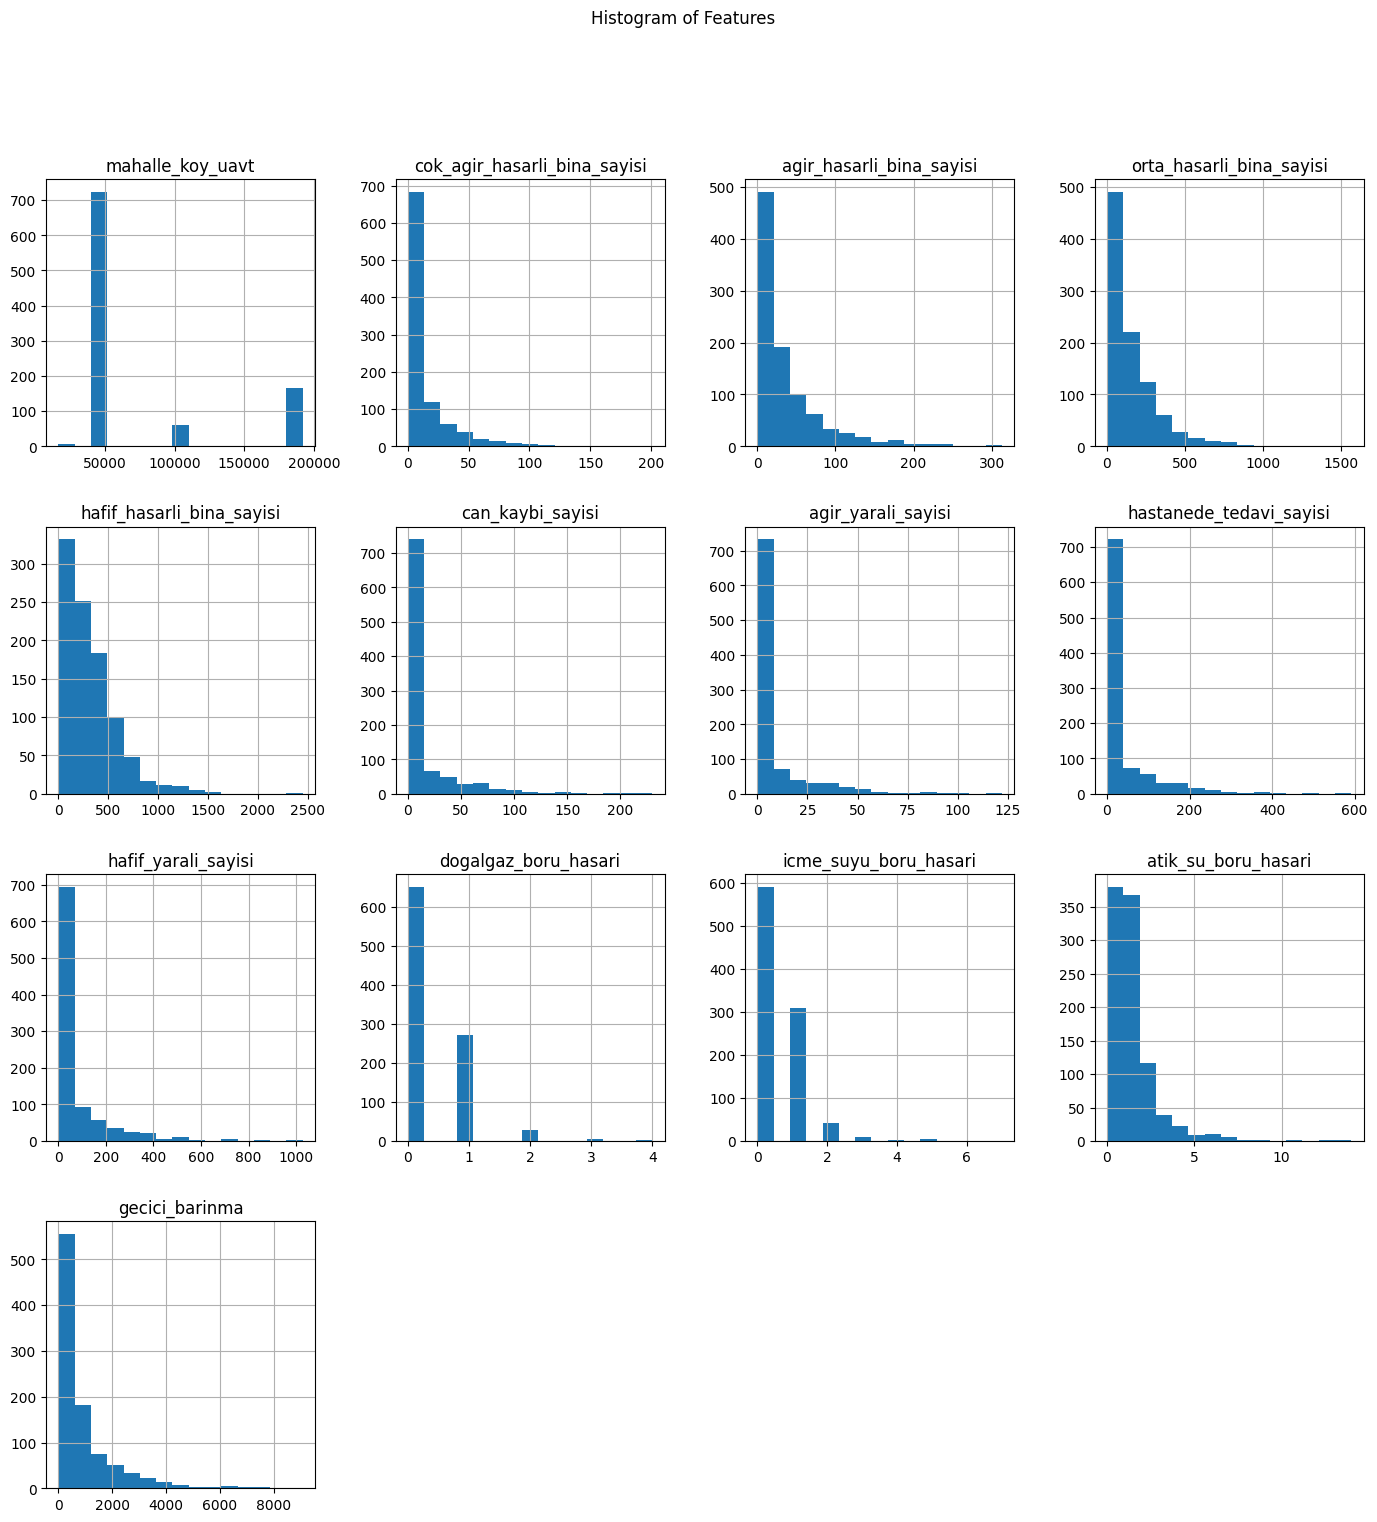

In [9]:
df.hist(bins=15,figsize=(17,17))
plt.suptitle("Histogram of Features")
plt.show()

                              mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  \
mahalle_koy_uavt                      1.000000                     -0.219561   
cok_agir_hasarli_bina_sayisi         -0.219561                      1.000000   
agir_hasarli_bina_sayisi             -0.264787                      0.912125   
orta_hasarli_bina_sayisi             -0.308731                      0.763863   
hafif_hasarli_bina_sayisi            -0.367522                      0.592846   
can_kaybi_sayisi                     -0.177390                      0.831466   
agir_yarali_sayisi                   -0.173552                      0.865972   
hastanede_tedavi_sayisi              -0.190762                      0.834955   
hafif_yarali_sayisi                  -0.203439                      0.827963   
dogalgaz_boru_hasari                 -0.219315                      0.525448   
icme_suyu_boru_hasari                -0.226392                      0.539754   
atik_su_boru_hasari                  -0.

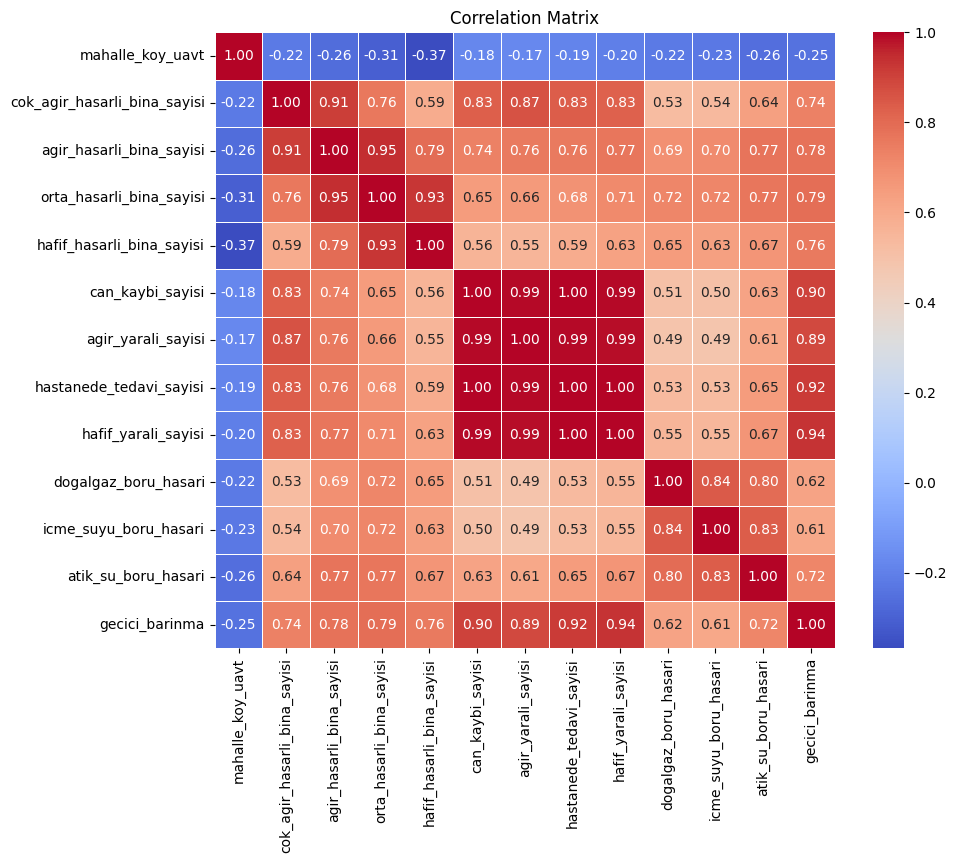

In [10]:
# Korelasyon matrisinden tarih sütununu çıkarıyoruz
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].drop(columns=['Date'], errors='ignore').corr()

print(corr_matrix)
correlation_matrix = df[numerical_features].drop(columns=['Date'], errors='ignore').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [12]:
#burada object veriler encode ediliyor.
df_encoded = pd.get_dummies(df, columns=["ilce_adi", "mahalle_adi"], drop_first=True)
print(df_encoded)

     mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  agir_hasarli_bina_sayisi  \
0               40139                            54                        99   
1               40142                           101                       175   
2               40143                            53                        97   
3               40140                           104                       192   
4               40141                           101                       180   
..                ...                           ...                       ...   
954             40831                            41                        80   
955             40839                            72                       133   
956             40836                            39                        80   
957             40833                            17                        33   
958             40835                            26                        52   

     orta_hasarli_bina_sayi

In [13]:
# Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop(columns=['can_kaybi_sayisi']) # Bağımsız değişkenler
y = df['can_kaybi_sayisi']  # Hedef değişken

# Kategorik özellikler için one hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns, drop_first=True)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modeli oluşturma ve eğitme
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test setinde tahmin
y_pred = rf_model.predict(X_test)

# Performans değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performansı:")
print(f"MSE: {mse:.4f}")
print(f"R2 Skor: {r2:.4f}")

Random Forest Regressor Performansı:
MSE: 1.5721
R2 Skor: 0.9970


In [14]:
from sklearn.metrics import r2_score

# R² skorunu hesapla
r2 = r2_score(y_test, y_pred)

print(f"R² Skoru: {r2:.4f}")

R² Skoru: 0.9970


In [19]:
# Yeni veriyi can kaybı sayısı tahmini için oluşturuyoruz
#X_train 14 feature'a sahip ancak RandomForsetRegressor 815 feature alıyor bunun için
# X_train ile aynı sütunlara sahip bir DataFrame oluşturuyoruz
new_data = pd.DataFrame(data=[[1, 2, 1001, 15, 30, 50, 100, 20, 50, 80, 2, 3, 1, 500]],
                      columns=['ilce_adi', 'mahalle_adi', 'Mahalle_Koy_UAVT', 'Cok_agir_hasarli_bina_sayisi',
                               'Agir_hasarli_bina_sayisi', 'Orta_hasarli_bina_sayisi', 'Hafif_hasarli_bina_sayisi',
                               'agir_yarali_sayisi', 'hastanede_tedavi_sayisi', 'hafif_yarali_sayisi',
                               'dogalgaz_boru_hasari', 'icme_suyu_boru_hasari', 'atik_su_boru_hasari',
                               'gecici_barinma_ihtiyaci'])

# Eğitim verileriyle aynı kodlamayı kullanarak yeni verileri tek seferde kodlayın
new_data_encoded = pd.get_dummies(new_data, columns=['ilce_adi', 'mahalle_adi'], drop_first=True)

# new_data_encoded sütunlarını X_train ile hizalayın
# Bu, new_data_encoded öğesinin X_train ile aynı sütunlara sahip olmasını sağlar,
# new_data'da bazı kategoriler eksik olsa bile
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# 'rf_model' kullanarak tahmin yapma
predicted_casualty = rf_model.predict(new_data_encoded)

# Sonucu yazdırma
print(f"Tahmini Can Kaybı Sayısı: {predicted_casualty[0]:.2f}")

Tahmini Can Kaybı Sayısı: 17.67


In [20]:
# Linear Regression modelini oluşturma ve eğitme
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_lr = linear_reg_model.predict(X_test)

# Performans değerlendirme
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Sonuçları yazdırma
print("Linear Regression Performansı:")
print(f"MSE: {mse:.4f}")
print(f"R² Skoru: {r2 :.4f}")


Linear Regression Performansı:
MSE: 0.8626
R² Skoru: 0.9984


In [21]:
new_data = pd.DataFrame(data=[[1, 2, 1001, 15, 30, 50, 100, 20, 50, 80, 2, 3, 1, 500]],
                      columns=['ilce_adi', 'mahalle_adi', 'Mahalle_Koy_UAVT', 'Cok_agir_hasarli_bina_sayisi',
                               'Agir_hasarli_bina_sayisi', 'Orta_hasarli_bina_sayisi', 'Hafif_hasarli_bina_sayisi',
                               'agir_yarali_sayisi', 'hastanede_tedavi_sayisi', 'hafif_yarali_sayisi',
                               'dogalgaz_boru_hasari', 'icme_suyu_boru_hasari', 'atik_su_boru_hasari',
                               'gecici_barinma_ihtiyaci'])

# Eğitim verileriyle aynı kodlamayı kullanarak yeni verileri tek seferde kodlayın
new_data_encoded = pd.get_dummies(new_data, columns=['ilce_adi', 'mahalle_adi'], drop_first=True)

# new_data_encoded sütunlarını X_train ile hizalayın
# Bu, new_data_encoded öğesinin X_train ile aynı sütunlara sahip olmasını sağlar,
# new_data'da bazı kategoriler eksik olsa bile
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# 'linear_reg_model' kullanarak tahmin yapma
predicted_casualty = linear_reg_model.predict(new_data_encoded)

# Sonucu yazdırma
print(f"Tahmini Can Kaybı Sayısı: {predicted_casualty[0]:.2f}")

Tahmini Can Kaybı Sayısı: 24.13


In [47]:
from xgboost import DMatrix, train
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# One-Hot Encoding uygulama
categorical_columns = ['ilce_adi', 'mahalle_adi']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


X = df_encoded.drop(columns=['can_kaybi_sayisi'])  # 'can_kaybi_sayisi' hedef değişken
y = df_encoded['can_kaybi_sayisi']

# Eğitim ve test veri setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost için DMatrix formatına dönüştürerek overfittingi engelliyoruz
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Hiperparametreler
params = {
    'objective': 'reg:squarederror',  # Regresyon problemi
    'learning_rate': 0.1,             # Öğrenme oranı
    'max_depth': 5,                   # Maksimum derinlik
    'subsample': 0.8,                 # Rastgele örnekleme oranı
    'colsample_bytree': 0.8,          # Özelliklerden rastgele örnekleme oranı
    'seed': 42                        # Rastgelelik için sabit bir değer
}

# Model eğitimi
num_boost_round = 200
xgb_model = train(params, dtrain, num_boost_round=num_boost_round)

# Test setinde tahmin
y_pred = xgb_model.predict(dtest)

# Performans metriği (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
print(f"R² Skoru: {r2 :.4f}")

Test MSE: 1.5427227020263672
R² Skoru: 0.9984


In [49]:
from xgboost import DMatrix

# Yeni veriyi DataFrame formatında oluşturma
new_data = pd.DataFrame(data=[[1, 2, 1001, 15, 30, 50, 100, 20, 50, 80, 2, 3, 1, 500]],
                      columns=['ilce_adi', 'mahalle_adi', 'Mahalle_Koy_UAVT', 'Cok_agir_hasarli_bina_sayisi',
                               'Agir_hasarli_bina_sayisi', 'Orta_hasarli_bina_sayisi', 'Hafif_hasarli_bina_sayisi',
                               'agir_yarali_sayisi', 'hastanede_tedavi_sayisi', 'hafif_yarali_sayisi',
                               'dogalgaz_boru_hasari', 'icme_suyu_boru_hasari', 'atik_su_boru_hasari',
                               'gecici_barinma_ihtiyaci'])

# Eğitim verileriyle aynı kodlamayı kullanarak yeni verileri tek seferde kodlayın
new_data_encoded = pd.get_dummies(new_data, columns=['ilce_adi', 'mahalle_adi'], drop_first=True)

# new_data_encoded sütunlarını X_train ile hizalayın
# Bu, new_data_encoded öğesinin X_train ile aynı sütunlara sahip olmasını sağlar,
# new_data'da bazı kategoriler eksik olsa bile
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# DMatrix formatına dönüştürme
new_data_dmatrix = DMatrix(new_data_encoded)

# 'xgb_model' kullanarak tahmin yapma
predicted_casualty = xgb_model.predict(new_data_dmatrix)

# Sonucu yazdırma
print(f"Tahmini Can Kaybı Sayısı: {predicted_casualty[0]:.2f}")


Tahmini Can Kaybı Sayısı: 20.99
